

learnING pandas for data manipulation
===========================

In [3]:
import pandas as pd
irisdata = pd.read_csv('iris.data', header=None, encoding='utf-8')
#irisdata

In [4]:
cnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
irisdata.columns = cnames
#irisdata

In [10]:
# 快速过滤
irisdata[irisdata['petal_width'] == irisdata.petal_width.max()]  

,sepal_length,sepal_width,petal_length,petal_width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


In [11]:
irisdata.iloc[::30,[-1,2]]

,class,petal_length
0,Iris-setosa,1.4
30,Iris-setosa,1.6
60,Iris-versicolor,3.5
90,Iris-versicolor,4.4
120,Iris-virginica,5.7


iloc中几个参数的含义
> [::30,[2,3]]

给出一个形式化的描述 [a:b:c,[list]]

其中a表示开始行号，b表示结束行号，c表示step的大小，comma后面可以跟一个list用来表示所取的列的__索引号__。其中a,b,c都可以省略


In [12]:
print irisdata['class'].value_counts()

for x in xrange(4):
    s = irisdata.iloc[:,x]
    print '{0:<12}'.format(s.name.upper()), " Statistics: " , \
    '{0:>5} {1:>5} {2:>5} {3:>5}'.format(s.max(), s.min(), round(s.mean(),2), round(s.std(), 2))

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64
SEPAL_LENGTH  Statistics:    7.9   4.3  5.84  0.83
SEPAL_WIDTH   Statistics:    4.4   2.0  3.05  0.43
PETAL_LENGTH  Statistics:    6.9   1.0  3.76  1.76
PETAL_WIDTH   Statistics:    2.5   0.1   1.2  0.76


In [15]:
import scipy as sp
import numpy as np
slogs = lambda x:sp.log(x)*x
entpy = lambda x:sp.exp((slogs(x.sum())-x.map(slogs).sum() )/x.sum())

irisdata.groupby('class').agg(entpy)

#类似SQL语句中的group by 分组，然后在其分组之上再调用agg为每个分组定义一个聚合函数，如果简单则以lambda表达式的形式


,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,49.878745,49.695242,49.654909,45.810069
Iris-versicolor,49.815081,49.680665,49.694505,49.452305
Iris-virginica,49.772059,49.714500,49.761700,49.545918


* DataFrame 二维表
* Series 数据表中的一列或一行，观测向量，一维数组
* Index 行索引， 行级元数据

In [31]:
import numpy as np
s = pd.Series(np.random.randn(4))
print s, type(s)
print s.index
print s.values
print "=============="
print s > 0
print s[s > 0]
# support broadcasting
print s*2
print s+5

0   -0.329986
1   -0.525647
2   -0.415344
3   -1.951361
dtype: float64 <class 'pandas.core.series.Series'>
RangeIndex(start=0, stop=4, step=1)
[-0.32998607 -0.52564669 -0.41534382 -1.95136127]
0    False
1    False
2    False
3    False
dtype: bool
Series([], dtype: float64)
0   -0.659972
1   -1.051293
2   -0.830688
3   -3.902723
dtype: float64
0    4.670014
1    4.474353
2    4.584656
3    3.048639
dtype: float64


In [4]:
# init a Series
# s = pd.Series([values], [index])
#s.name = 'totalname'
#s.index.name = 'indexname'



In [51]:
#从 NumPy 二维数组、从文件或者直接从数据库定义：最好定义列名。
import numpy as np
import pandas as pd
dataNumpy = np.asarray([('Japan','Tokyo',4000),('S.Korea','Seoul',1300),('China','Beijing',9100)])
df1 = pd.DataFrame(dataNumpy, columns=['nation','capital','GDP'])
#df1
dataDict = {'nation':['Japan','S.Korea','China'], 'capital':['Tokyo','Seoul','Beijing'],'GDP':[4000,1300,9300]}
df2 = pd.DataFrame(dataDict) #字典key是无序的
#df2
df21 = pd.DataFrame(df2, columns=['nation','capital','GDP'])
df22 = pd.DataFrame(df2, columns=['nation','capital','GDP'], index=[2,0,1])
df22

,nation,capital,GDP
2,China,Beijing,9300
0,Japan,Tokyo,4000
1,S.Korea,Seoul,1300


In [28]:
#从DataFrame中取出某一列有2种方法：
# 1 '.'的写法容易与保留字冲突
# 2 '[]'的写法比较安全
print df22.nation
print df22['GDP']

2      China
0      Japan
1    S.Korea
Name: nation, dtype: object
2    9300
0    4000
1    1300
Name: GDP, dtype: int64


In [63]:
## 从DataFrame中取得行，常用的方法
#print df22[0:2] #返回的实际是DataFrame
print df22.ix[2:1] #通过对应的index给出行. ix[0,2]表示取得第0行的第2列 ix[a:b] 返回a,b范围内的行(a,b大小没有要求)


    nation  capital   GDP
2    China  Beijing  9300
0    Japan    Tokyo  4000
1  S.Korea    Seoul  1300


In [70]:
#print df22.iloc[0,:]
print df22.iloc[:,0]
#动态增加列的方式无法用.完成，只能用[]
df22['pop'] = [1600, 130, 55]
print df22

2      China
0      Japan
1    S.Korea
Name: nation, dtype: object
    nation  capital   GDP   pop
2    China  Beijing  9300  1600
0    Japan    Tokyo  4000   130
1  S.Korea    Seoul  1300    55


In [75]:
index_names = ['a','b', 'c']
series_for_index = pd.Series(index_names)
#print pd.Index(index_names)
#print pd.Index(series_for_index)
#这样得到的Index是immutable的
id0 = pd.Index(index_names)
id0[2] = 'd' # TypeError: Index does not support mutable operations


TypeError: Index does not support mutable operations

In [78]:
# multiIndex
multi = pd.Index([('Row_' + str(x+1), 'Col_' + str(y+1)) for x in xrange(4) for y in xrange(4)])
multi.name = ['index1', 'index2']
print multi

MultiIndex(levels=[[u'Row_1', u'Row_2', u'Row_3', u'Row_4'], [u'Col_1', u'Col_2', u'Col_3', u'Col_4']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])


In [85]:
d = pd.Series(xrange(0,16), index = multi) # note: here is Series, its just a vector.
#d
d.unstack().stack()

Row_1  Col_1     0
       Col_2     1
       Col_3     2
       Col_4     3
Row_2  Col_1     4
       Col_2     5
       Col_3     6
       Col_4     7
Row_3  Col_1     8
       Col_2     9
       Col_3    10
       Col_4    11
Row_4  Col_1    12
       Col_2    13
       Col_3    14
       Col_4    15
dtype: int32

In [91]:

multi2 = pd.Index( [('Row_' + str(x+1), 'Col_' + str(y+1)) for x in xrange(5) for y in xrange(x)])
#multi2
d2 = pd.Series(np.arange(10), index = multi2)
d2.unstack()#.stack()

,Col_1,Col_2,Col_3,Col_4
Row_2,0.0,NaN,NaN,NaN
Row_3,1.0,2.0,NaN,NaN
Row_4,3.0,4.0,5.0,NaN
Row_5,6.0,7.0,8.0,9.0


In [97]:
# DateTime
import datetime
dates = [datetime.datetime(2015,1,1), datetime.datetime(2015,1,8), datetime.datetime(2015,1,30)]
#pd.DatetimeIndex(dates) # 用时间作行索引

# 如果不仅需要时间格式同意，时间频率也要统一
pid1 = pd.period_range('2015-01', '2015-04', freq='M')
print pid1

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04'], dtype='int64', freq='M')


In [106]:
#print pid1.asfreq('D', how='start')
period2 =  pid1.asfreq('D', how='end')
period2
for x in pid1.asfreq('D', how='end'):
    print x

2015-01-31
2015-02-28
2015-03-31
2015-04-30


In [122]:
periodindex_mon = pd.period_range('2015-01', '2015-03', freq='d').asfreq('d')
periodindex_day = pd.period_range('2015-01-01','2015-03-01', freq='D')
#print periodindex_mon
print periodindex_day

PeriodIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
             '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
             '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
             '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
             '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
             '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
             '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
             '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-01',
             '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05',
             '2015-02-06', '2015-02-07', '2015-02-08', '2015-02-09',
             '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13',
             '2015-02-14', '2015-02-15', '2015-02-16', '2015-02-17',
             '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21',
             '2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25',
             '2015-02-26', '2015-0

# I/O 处理
* header 表示数据中是否存在某一行，该行的数据为各个列的列名。如果第0行就写0，并且读数据的时候跳过相应的行数，不存在可以写None
* names 表示用给的列名来作为最终的列名
* encoding 表示数据集的编码

读取处理：
* skiprows : 跳过一定的行数
* nrows : 仅读取一定的行数
* skipfooter 尾部有固定的行数永不读取
* skip_blank_lines 空行跳过

内容处理：
* sep/delimiter 分隔符，常见的有逗号，空格(\s)和Tab(\t)
* na_values 指定应该被当作na_values的数值
* thousands 处理数值类型时，每千位分隔符并不统一(1.234.567,89或者1,234,556.78)，此时要把字符串转化为数字需要指明千分位的符号

收尾处理：
* index_col 将真实的某列(列的数目，甚至列名）当作index
* squeeze 仅读到一列的时候，不再保存为DataFrame，而是Series

NOTE: 读取excel的时候一个重要参数为sheetname=k,标志着一个excel的第k个sheet页将会被取出

In [ ]:



irisdata = pd.read_csv('iris.data', header = 0,  names = cnames, encoding = 'utf-8')
#irisdata
irisdata.to_excel('iris.xls',index=None, encoding='utf-8')
irisdata_from_excel = pd.read_excel('iris.xls', header=0, encoding='utf-8')
irisdata_from_excel

In [15]:
import pandas as pd
import json
json_data = [{'name': 'Wang','Sal':50000,'job':'vp','gender':'male'},\
            {'name':'Zhang','job':'manager','report':'VP'},\
            {'name':'Li','Sal':3333,'report':'IT'}]
print (json.dumps(json_data))
data_employee = pd.read_json(json.dumps(json_data))
data_employee_ri = data_employee.reindex(columns=['name','job','sal','report','gender'])
data_employee_ri

[{"gender": "male", "job": "vp", "name": "Wang", "Sal": 50000}, {"report": "VP", "job": "manager", "name": "Zhang"}, {"report": "IT", "name": "Li", "Sal": 3333}]


,name,job,sal,report,gender
0,Wang,vp,NaN,NaN,male
1,Zhang,manager,NaN,VP,NaN
2,Li,NaN,NaN,IT,NaN


In [49]:
# 深入pandas数据操纵
import numpy as np
# 横向拼接：直接DataFrame
pd.DataFrame([np.random.rand(2), np.random.rand(2), np.random.rand(2)], columns=['C1', 'C2'])
# 横向拼接：Concatenate
d = pd.concat([data_employee_ri, data_employee_ri, data_employee_ri])

# 纵向拼接

#pd.merge(data_employee_ri, data_employee_ri, on='name')
pd.merge(data_employee_ri, data_employee_ri, on=['name','job'])


# 根据index关联，可以直接使用left_index和right_index
data_employee_ri.index.name = 'index1'
#data_employee_ri.index = ['name1','job1','sal1']
#data_employee_ri.ix['name1']
#pd.merge(data_employee_ri, data_employee_ri, left_index='index1', right_index='index1')
#pd.merge(data_employee_ri, data_employee_ri, how='outer', on='name')

In [ ]:
# 自定义函数映射
dataNumPy32 = np.asarray([('Japan','Tokyo',4000),('S.Korea','Seoul',1200),('China','Beijing',9100)])
df32 = pd.DataFrame(dataNumPy32, columns=['nation','capital','GDP'])
df32
# map以相同规则将一列数据作一个映射，也就是进行相同函数的处理

def GDP_Factorize(v):
    fv = np.float64(v)
    if fv > 6000.0:
        return 'High'
    elif fv < 2000.0:
        return 'Low'
    else:
        return 'Medium'
    
df32['GDP_level'] = df32['GDP'].map(GDP_Factorize)
df32['NATION']=df32.nation.map(str.upper)
df32

In [31]:
import numpy as np
import pandas as pd
dataNumPy33 = np.asanyarray([('Japan','Tokyo',4000),('S.Korea','Seoul',1200),('China','Beijing',9100)])
df33 = pd.DataFrame(dataNumPy33, columns=['nation','capital','GDP'])
#df33
## df33.sort('GDP')  sort is deprecated. plz use sort_values(by=.....)
df33.sort_values(by='GDP')
df33.sort_values(by='GDP', ascending=False)
df33.sort_values(by=['capital','nation'], ascending=False)
df33.sort_index(axis=1, ascending=True)
# df.sore_index(axis=1,ascending=False) #按照columnID进行排序，设定为降序


,GDP,capital,nation
0,4000,Tokyo,Japan
1,1200,Seoul,S.Korea
2,9100,Beijing,China


In [23]:

df33.rank()


,nation,capital,GDP
0,2.0,3.0,2.0
1,3.0,2.0,1.0
2,1.0,1.0,3.0


In [34]:
df33.rank(ascending=False)
df33.rank(axis=1, ascending=False)
# df.rank() 默认在各个column里面进行排序
# df.rank(axis=1)默认在各个row里面进行排序

,nation,capital,GDP
0,2.0,1.0,3.0
1,2.0,1.0,3.0
2,1.0,2.0,3.0


In [39]:
# 缺失数据处理
multi2 = pd.Index( [('Row_' + str(x+1), 'Col_' + str(y+1)) for x in xrange(5) for y in xrange(x)])
#multi2
d2 = pd.Series(np.arange(10), index = multi2)
d2 = d2.unstack()#.stack()
d2.mean(skipna=True)
d2.mean(skipna=False)
d2.fillna(0).mean(axis=1,skipna=False) # axis = 1表示按照row的维度计算mean的值


Row_2    0.00
Row_3    0.75
Row_4    3.00
Row_5    7.50
dtype: float64

split-apply-combine
* split 就是按照规则分组
* apply 通过一定的agg函数来获得输入pd.Series返回一个值的效果
* combine 把结果收集起来

Pandas的group by的灵活性：
* 分组的关键字可以来自于index,也可以来自于真实的列数据
* 分组规则可以通过一列或者多列

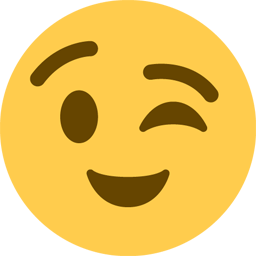

In [2]:
from IPython.display import Image
Image(filename='1f609.png')

In [8]:
import pandas as pd
import numpy as np
irisdata_group = irisdata.groupby('class')
irisdata_group
for  level, subsetDF in irisdata_group:
    print level
    print subsetDF

Iris-setosa
    sepal_length  sepal_width  petal_length  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13      

分组可以快速实现MapReduce的逻辑
* Map:指定分组的列标签，不同的值就会被扔到不同的分组处理
* Reduce:输入多个值，返回一个值，一般可以通过agg实现，agg能接受一个函数

In [10]:
irisdata.groupby('class').agg(\
        lambda x: ((x-x.mean())**3).sum() * len(x)/(len(x)-1)/(len(x)-2)/x.std()**3 if len(x) > 2 else None)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,0.120087,0.107053,0.071846,1.197243
Iris-versicolor,0.105378,-0.362845,-0.606508,-0.031180
Iris-virginica,0.118015,0.365949,0.549445,-0.129477


In [2]:
import pandas as pd
s = pd.Series([2,3,4])
print s**3

0     8
1    27
2    64
dtype: int64


In [11]:
irisdata.describe()
irisdata.mean(axis = 1) # 求每行的均值
irisdata[0:2] # the first two rows
irisdata[-3:] # the three last rows


,sepal_length,sepal_width,petal_length,petal_width,class
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
from pylab import *
# indexing the columns
irisdata['sepal_length']


# conditional indexing
irisdata[irisdata['sepal_length'] > 5.0 ].sepal_length
irisdata['sepal_length'].hist() # Histogram 直方图
show()

irisdata['sepal_length'].plot(kind='kde') # 核密度估计 ( kernel density estimate)
show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline